# Graduate Admissions - EDA/Linear Regression

## Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
style.use(['fivethirtyeight', 'seaborn-whitegrid'])

## Dataset

I will be using the Version 1.1 dataset as it has more rows of data.

In [2]:
grad_DF = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
grad_DF.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
grad_DF.shape

(500, 9)

This dataset has 500 rows and 9 columns.

## Explaining the Features

* GRE Score: The scores acquired in the Graduate Record Examination (GRE). It is a standardized test that is an admission requirement for many graduate schools in the United States and Canada. The highest possible score in the GRE is 340.
* TOEFL Score: The scores acquired in the Test of English as a Foreign Language (TOEFL). It is a standardized test to measure the English language ability of non-native speakers wishing to enroll in English-speaking universities. The highest possible score in the TOEFL is 120.
* University Rating: The rating of the university out of 5.
* SOP: Statement of Purpose rating out of 5. It is an essay stating the purpose of applying to a particular course in a particular university.
* LOR: Letter of Recommendation rating out of 5. A letter of recommendation is a document used by someone who is applying for a job, internship, college application, leadership position or volunteer opportunity. The purpose of a recommendation letter is to validate what the employer has learned about the applicant and get answers to outstanding questions about their performance or habits.
* CGPA: Cumulative Grade Point Average out of 10. It is the average of Grade Points obtained for all semesters and courses completed up to a given academic term.
* Research: This is a binary value. It depicts whether the graduate has any research experience.
* Chance of Admit: The chance of admission for a student.

# Data Preparation

## Altering Column Names

In [5]:
list(grad_DF.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

The column names 'LOR ' and 'Chance of Admit ' have a space at the end. With the code below, I will be removing the space.

In [6]:
grad_DF.rename(columns = {"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace = True)

After the removal of the space:

In [7]:
list(grad_DF.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance of Admit']

## Removing the Serial Number Column

In [8]:
grad_DF.drop(columns=['Serial No.'], inplace = True)

In [9]:
grad_DF.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Analysis

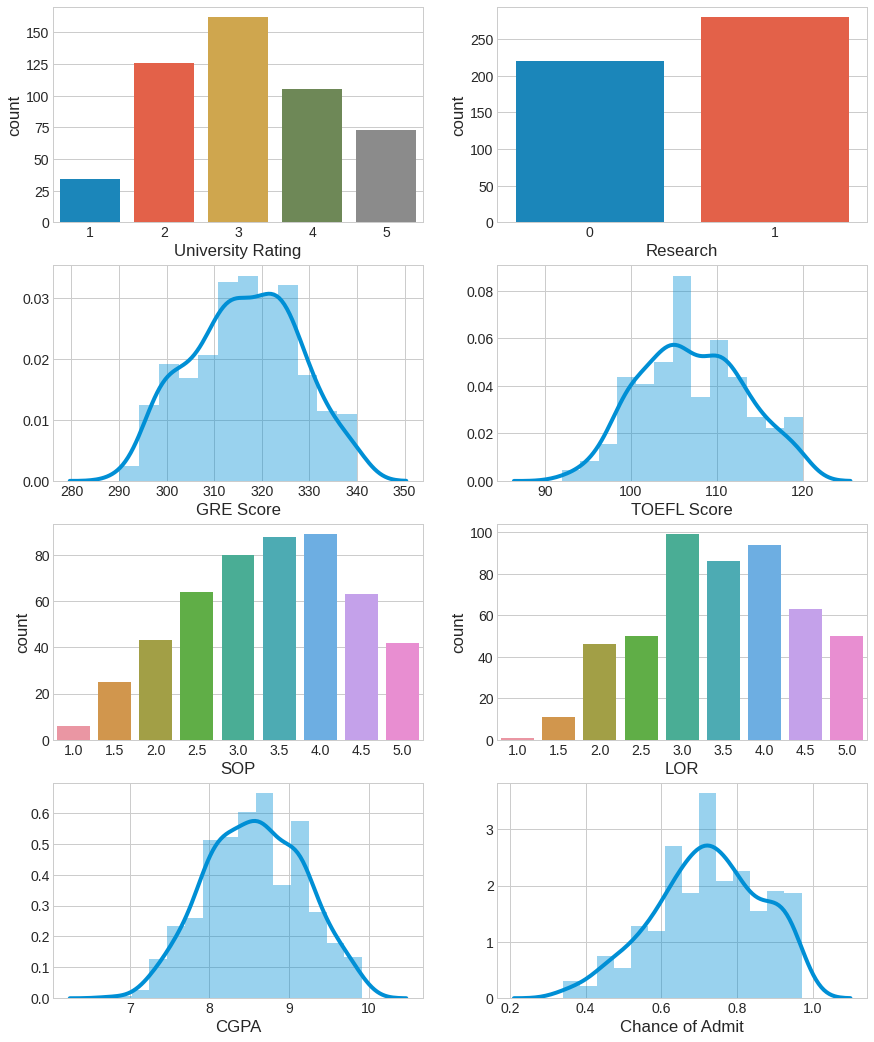

In [10]:
f, ax1 = plt.subplots(4, 2, figsize = (13,17))
sns.countplot(data = grad_DF, x = "University Rating", ax = ax1[0,0])
sns.countplot(data = grad_DF, x = "Research", ax = ax1[0,1])
sns.distplot(grad_DF["GRE Score"], ax = ax1[1, 0])
sns.distplot(grad_DF["TOEFL Score"], ax = ax1[1, 1])
sns.countplot(data = grad_DF, x = "SOP", ax = ax1[2,0])
sns.countplot(data = grad_DF, x = "LOR", ax = ax1[2,1])
sns.distplot(grad_DF["CGPA"], ax = ax1[3, 0])
sns.distplot(grad_DF["Chance of Admit"], ax = ax1[3, 1])
plt.show()

In [11]:
grad_DF[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


* Majority (32.4%) of all graduates have a University Rating of 3. University Rating of 1 is the minority (6.8%).
* 56% of all graduates have done research.
* Majority (19.8%) of all graduates have a Letter of Recommendation strength of 3.0. This is followed by a strength of 4.0, with 18.8% of all graduates.
* The majority (35.4%) of all graduates have a score of 3.5 and 4 for their Statement of Purpose.
* The mean GRE Score is 316.4. The lowest and highest GRE score is 290 and 340 respectively.
* The mean TOEFL Score is 107. The lowest and highest TOEFL score is 92 and 120 repectively.
* The mean chance of admission is 72.17%. The lowest and highest chance of admission is 34% and 97% respectively.

# Correlation

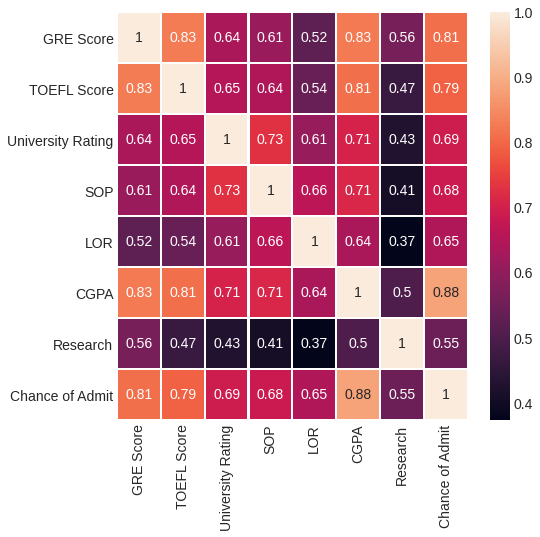

In [12]:
grad_corr = grad_DF.corr()
plt.figure(figsize = (7,7))
sns.heatmap(grad_corr, annot = True, linewidths = 1.2, linecolor = 'white')
plt.show()

Out of all the predictors, CGPA has the highest correlation to the target variable, Chance of Admission. Research has the lowest correlation to the Chance of Admission. The predictors have high correlation to each other, which can affect the multicollinearity. 

# Linear Regression

The target variable in this case will be the chance of admission.

In [13]:
X = grad_DF[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
Y = grad_DF['Chance of Admit']

## Scaling the Features

In [14]:
X_scaled = preprocessing.scale(X)
X_scaled_DF = pd.DataFrame(data = X_scaled, columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])
X_scaled_DF.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


Since all of these features are measured differently, scaling will be necessary. This will ensure that the features are assessed at the same level.

## Train and Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

The training and testing dataset follows the 80/20 split

In [16]:
grad_reg = LinearRegression()
grad_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
grad_pred = grad_reg.predict(X_test)

## VIF Values

The variance influence factor (VIF) quantifies the correlation between one predictor and the other predictors in the model.

In [18]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled_DF.values, i) for i in range(X_scaled_DF.shape[1])]
vif["Features"] = X_scaled_DF.columns

vif

,VIF,Features
0,4.464249,GRE Score
1,3.904213,TOEFL Score
2,2.621036,University Rating
3,2.835210,SOP
4,2.033555,LOR
5,4.777992,CGPA
6,1.494008,Research


## Actual and Predicted Values

In [19]:
pred_DF = pd.DataFrame({'Actual': Y_test, 'Predicted': grad_pred})
pred_DF.head(20)

,Actual,Predicted
361,0.93,0.914575
73,0.84,0.795181
374,0.39,0.572660
155,0.77,0.707370
104,0.74,0.815883
394,0.89,0.862066
377,0.47,0.474597
124,0.57,0.648509
68,0.68,0.823787
450,0.82,0.807415


## MAE, MSE and RMSE

Mean Absolute Error measures the absolute value of the errors between the actual values and the predicted values.

<img src = "https://miro.medium.com/max/1040/1*tu6FSDz_FhQbR3UHQIaZNg.png" width = 300px>

Mean Squared Error measures the average squared difference between the predicted values and the actual values.

<img src = "https://i.imgur.com/vB3UAiH.jpg" width = 300px>

Root Mean Squared Error measures the square root of the differences between predicted and actual values.

<img src = "https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmse-2.png" width = 300px>

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, grad_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, grad_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, grad_pred)))

Mean Absolute Error: 0.042722654277053664
Mean Squared Error: 0.00370465539878841
Root Mean Squared Error: 0.060865880415783113


## R-squared Value

R-squared value measures of how well the values are predicted. The higher the R-squared value, the better the model fits the data.

In [21]:
metrics.r2_score(Y_test, grad_pred)

0.8188432567829629

# Conclusion

With an R-squared value of 0.8188, this shows that the model used explains 81.88% of the variation in the response variable around its mean.